In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import networkx as nx
import scipy
from sklearn.cluster import KMeans
from sklearn.cluster import spectral_clustering
import helpers
import importlib

In [2]:
importlib.reload(helpers)
# Load graph and adjacency matrix
graph_file = "ca-GrQc.txt"

graph_data, header = helpers.load_graph(graph_file)
adjacency_matrix = helpers.calculate_adjacency_matrix(graph_data)

print(header)

p ca-GrQc 5242 14496


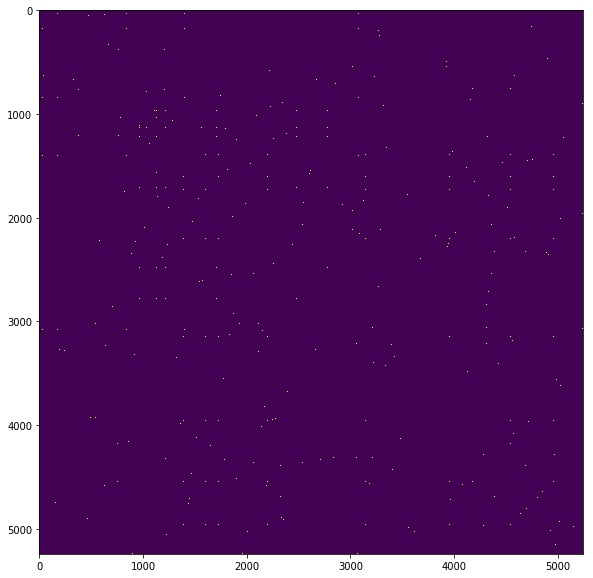

In [143]:
plt.figure(figsize=(10,10))
plt.imshow(adjacency_matrix)

In [3]:
# Initialize networkx graph for visualization and faster laplacian calculation
graph = nx.from_numpy_matrix(adjacency_matrix)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


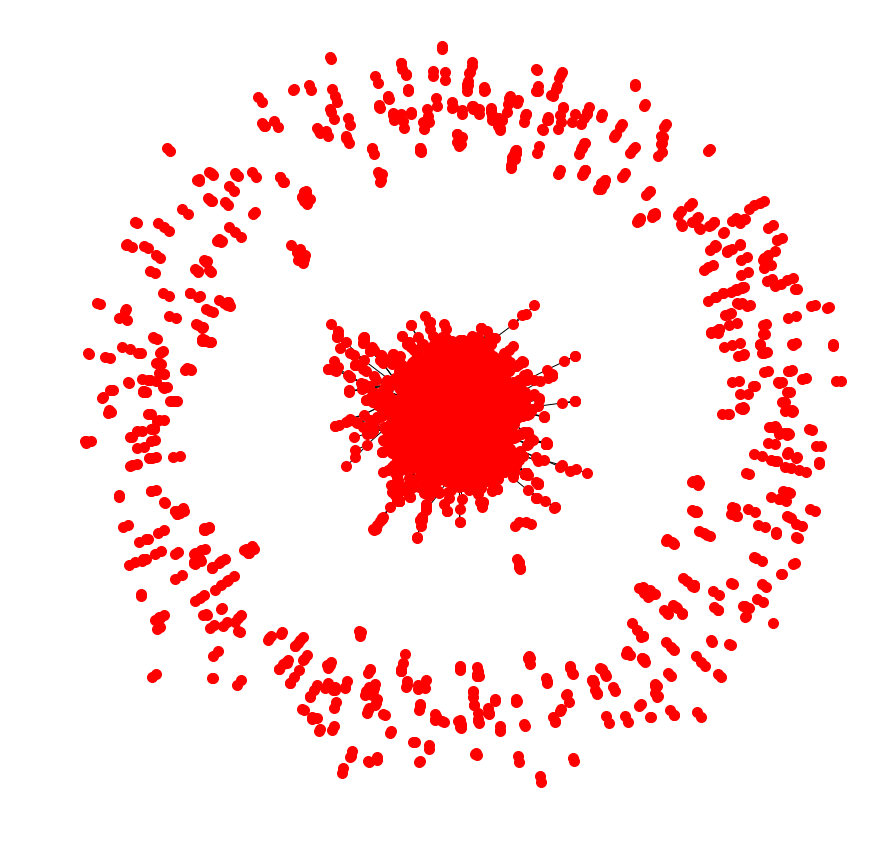

In [61]:
# Plot graph
fig, ax = plt.subplots(1,1, figsize=(15,15))
nx.draw(graph, with_labels=False, ax=ax, node_size=100) # Warning: takes a long time to run

In [13]:
A = adjacency_matrix
D = helpers.calculate_degree_mat(A)
L = helpers.calculate_normalized_laplacian(A,D)

In [16]:
L_b = nx.normalized_laplacian_matrix(graph) 

In [42]:
L_b.data

array([ 1.        , -0.28867513,  1.        , ..., -0.70710678,
       -0.70710678,  1.        ])

In [43]:
L_b.indices

array([   0, 5040,    1, ...,   44, 2256, 5241], dtype=int32)

In [10]:
# Benchmark against sklearn 
labels = spectral_clustering(adjacency_matrix, n_clusters=20, eigen_solver='arpack')
print(helpers.objective_function(graph_data, labels))
print(np.unique(labels, return_counts=True))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


1660.6666666666667
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int32), array([3980,   35,   24,   16,   24,    7,   38,  106,   52,    9,   13,
         29,    5,   83,    3,    4,  785,    4,   16,    9]))


In [12]:
importlib.reload(helpers)
# Do spectral cluster alg
U_norm, C_labels = helpers.spectral_cluster(graph=graph, k=20, normalized=True, random_state=0)
print(helpers.objective_function(graph_data, C_labels))
print(np.unique(C_labels, return_counts=True))

2055.0
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int32), array([2125,    4,    2,    2,    1,    4,    5,    2,    1,    2,    2,
          2,    1, 3000,    2,    1,   26,    4,   55,    1]))


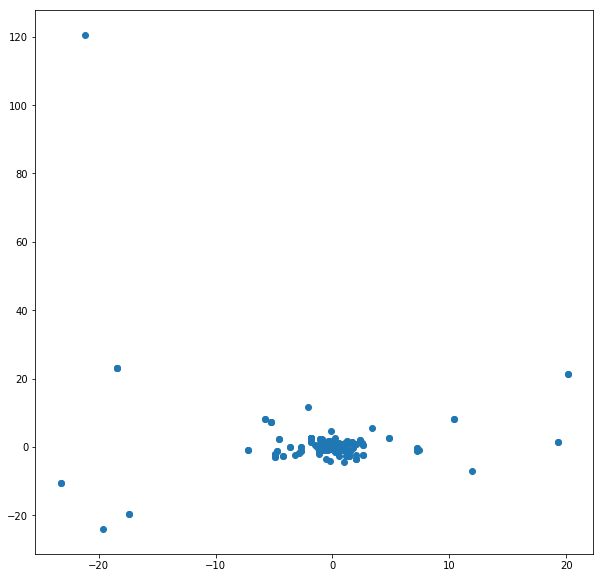

In [7]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
plt.scatter(U_norm[:,0], U_norm[:,1])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


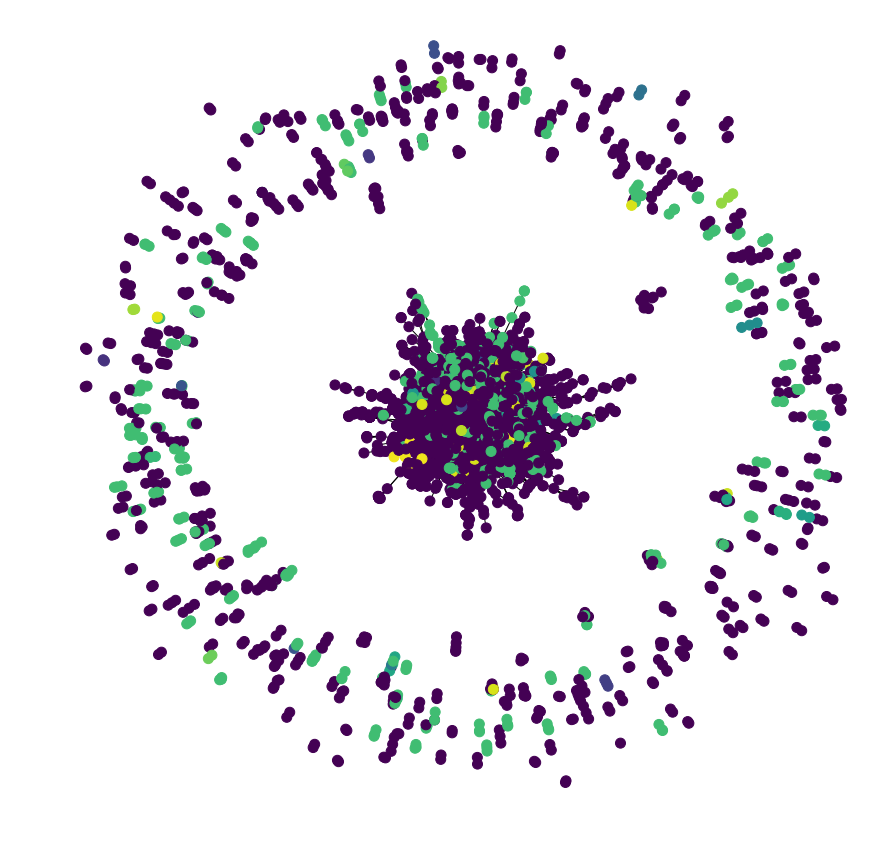

In [8]:
fig, ax = plt.subplots(1,1, figsize=(15,15))
nx.draw(graph, with_labels=False, ax=ax, node_size=100, node_color=C_labels) 

365